# Regression model Notebook
- Coded By : <span style="color: red;">Eng.Ahmed Almohamdy</span>


# Implementing the linear regression model from scratch using the closed form solution
- this method used in sklearn not GD

### Trying a naive approach that implements the closed form solution as it is on non-perfect data
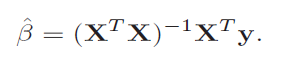

In [36]:
# # should produce an error 
# x_transpose = np.transpose(X_train.values)
# xT_x = np.matmul(x_transpose , X_train.values)
# inverse_xT_x = np.linalg.inv(xT_x)
# optimum_coefficients = np.matmul((np.matmul(inverse_xT_x, x_transpose)), y_train.values)

### Treating the previous error using the Singular Value Decomposition to calculate the pseudo-inverse of the data matrix
optimal coefficients = image.png

In [37]:
# # calculating the economy svd (where the u matrix has the same size as the data matrix X, nad the sigma matrix is square matrix)
# # AKA: no silent vectors in the u Matrix, so it is not square and not orthogonal (uTu = I, but uuT is != I)
# def linear_reg_SVD(X, Y, zero_threshold = 1e-13):
#   u, s, vT = np.linalg.svd(X, full_matrices= False)

#   # Now initialize the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero"
#   sigma_pseudo_inverse = np.zeros((vT.shape[0], vT.shape[0]))

#   ## getting the index of the first approximately zero singular value
#   idx_nearly_zero_sigma= np.where(s <= zero_threshold)[0][0]

#   # 1/non-zero diagonal elements calculation
#   sigma_pseudo_inverse[:idx_nearly_zero_sigma,:idx_nearly_zero_sigma] = np.diag(1/s[ :idx_nearly_zero_sigma])
#   #the above three lines could have been calculated via:
#   # sigma_pseudo_inverse = = np.linalg.pinv(np.diag(s), rcond=1e-13)

#   # calculating the optimal coefficients
#   optimal_coefficients = vT.T.dot(sigma_pseudo_inverse).dot(u.T).dot(Y)
#   return optimal_coefficients

In [38]:
# optimal_coefficients = linear_reg_SVD(X_train, y_train, zero_threshold = 1e-13)
# y_hat_from_scratch = X_train.values.dot(optimal_coefficients)

### Comparing our output to the implemented solution in sklearn (which is calculated using the pseudo inverse of train data as we did above)

In [42]:
## trying the linear regression of sklearn with closed form solution approximated with the SVD as well
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [44]:
regressor.score(x_train , y_train) 

0.9227023569892417

In [45]:
regressor.score(x_val , y_val) 

-3.3453857610162344e+19

In [50]:
y_predicted_train = regressor.predict(x_train)

In [51]:
y_predicted_val = regressor.predict(x_val)

In [49]:
# real_y_hat_val = min_max_scaler_y.inverse_transform(scaled_y_hat_val)
# real_y_val = min_max_scaler_y.inverse_transform(y_val)

In [46]:
# pd.DataFrame(real_y_hat_val).rename(columns={0:'predectid prices'})

In [54]:
from sklearn.metrics import mean_squared_error
train_error = (mean_squared_error(y_train , y_predicted_train))
val_error   = (mean_squared_error(y_val , y_predicted_val))
print('Train_error:',train_error , '   val_error : ',val_error)

Train_error: 0.0036464937950770535    val_error :  1.7059192889531064e+18


## Evaluating matrix of our linear regression model

In [48]:
# def mse(actual, predicted):
#   return np.mean(np.square(actual-predicted))

# def rmse(actual, predicted):
#   return np.sqrt(np.mean(np.square(actual-predicted)))

# def mae(actual, predicted):
#   return np.mean(np.abs(actual-predicted))

# def mape(actual, predicted, epsilon = 0.0001):
#   return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

# def rae(actual, predicted):
#   numerator = np.sum(np.abs(predicted - actual))
#   denominator = np.sum(np.abs(np.mean(actual) - actual))
#   return numerator / denominator

# def r_squared(actual, predicted):
#   sse = np.sum(np.square(actual-predicted))
#   sst = np.sum(np.square(actual-np.mean(actual)))
#   return 1 - (sse/sst)

# def adj_r_squared(X, actual, predicted): 
#   r_squ = r_squared(actual, predicted)
#   first_term = 1 - r_squ
#   sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
#   return 1 - (first_term * sec_term)

In [49]:
# print('The mean squared error is: ', mse(y_train, y_hat_sklearn))
# print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
# print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
# print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
# print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
# print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
# print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))

### when we face Overfitting we have two method to face it :
- first is Subset selection via Hypothesis Testing and to make it work efficint we should remove multicollinearity by using VIF 
- 2nd is regularization using Ridge or Lasso regression 

# Multicollinearity Handling 

In [95]:
print(x_train.shape , x_val.shape)

(1059, 126) (353, 126)


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = x_train.copy()
significant_feats_df_val = x_val.copy()

while True:
    vif = [variance_inflation_factor(cleaned_df_from_multi_coll.values, i) for i in range(cleaned_df_from_multi_coll.shape[1])]
    max_vif = max(vif)
    
    if max_vif > 20:
        max_vif_index = vif.index(max_vif)
        feat_to_drop = cleaned_df_from_multi_coll.columns[max_vif_index]
        
        feats_high_vif_to_be_dropped.append(feat_to_drop)
        cleaned_df_from_multi_coll.drop(columns=[feat_to_drop], inplace=True)
        significant_feats_df_val.drop(columns=[feat_to_drop], inplace=True)
    else:
        break


C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781

In [96]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# feats_high_vif_to_be_dropped = []
# cleaned_df_from_multi_coll = x_train.copy()
# significant_feats_df_val = x_val.copy()
# num_cols_removed = 0

# for origin_df_feat_index in range(len(x_train.columns)):
#   num_cols_removed = x_train.shape[1] - cleaned_df_from_multi_coll.shape[1]

#   cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    
#   VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
#   if VIF_FEAT > 20:
        
#     feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
#     cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])
#     significant_feats_df_val.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]] , inplace=True)

C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ahmed\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarni

In [104]:
print(cleaned_df_from_multi_coll.shape,significant_feats_df_val.shape)

(1059, 103) (353, 103)


In [105]:
len(feats_high_vif_to_be_dropped)

20

#### Having cleaned our training data from multi-collinearity, we can measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [90]:
from statsmodels.api import OLS
LRresult = OLS(y_train.values,cleaned_df_from_multi_coll).fit().summary2().tables[1]
LRresult

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
MoSold,-0.000063,0.002342,-0.027103,0.978384,-0.004659,0.004532
BsmtFullBath,0.069515,0.015811,4.396701,0.000012,0.038487,0.100542
Veenker,0.103519,0.034343,3.014267,0.002644,0.036123,0.170916
Plywood,-0.021031,0.018612,-1.129978,0.258768,-0.057555,0.015494
Plywood,-0.006718,0.017526,-0.383312,0.701573,-0.041112,0.027676
...,...,...,...,...,...,...
AsbShng,-0.022384,0.043592,-0.513490,0.607727,-0.107930,0.063162
AsbShng,0.015046,0.043829,0.343286,0.731459,-0.070967,0.101059
CarPort,-0.035667,0.037193,-0.958965,0.337818,-0.108656,0.037322
YearRemodAdd,0.016572,0.011088,1.494685,0.135326,-0.005186,0.038331


In [106]:
significant_feats_df = cleaned_df_from_multi_coll
LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
  insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
  insignificant_feats_ls.append(insignificant_feat)
  significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
  significant_feats_df_val.drop(columns = [insignificant_feat] , inplace=True)
  LRresult = (OLS(y_train.values,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [107]:
len(insignificant_feats_ls)

41

In [71]:
LRresult

,feature_name,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
0,BsmtFullBath,0.072215,0.014818,4.873501,1.271509e-06,0.043138,0.101292
1,Veenker,0.071447,0.028365,2.518901,1.192492e-02,0.015788,0.127107
2,SawyerW,0.025959,0.012201,2.127564,3.361375e-02,0.002016,0.049902
3,LotArea,0.018677,0.003228,5.786412,9.573545e-09,0.012343,0.025011
4,GarageCars,0.135430,0.016069,8.427925,1.193180e-16,0.103897,0.166963
5,1Story,0.026647,0.011272,2.363961,1.826824e-02,0.004528,0.048767
6,OverallCond,0.129909,0.011908,10.909523,2.795682e-26,0.106543,0.153276
7,NridgHt,0.150185,0.013393,11.213471,1.358251e-27,0.123904,0.176467
8,CemntBd,-0.124531,0.044002,-2.830092,4.745243e-03,-0.210877,-0.038185
9,Somerst,0.105048,0.012046,8.720873,1.111892e-17,0.081411,0.128685


In [108]:
regressor2 = LinearRegression()
regressor2.fit(significant_feats_df , y_train)

LinearRegression()

In [109]:
regressor2.score(significant_feats_df , y_train)

0.8986061349607612

In [110]:
regressor2.score(significant_feats_df_val , y_val)

0.8605854521616614

## Using Shrinkage methods (Ridge, Lasso and Elastic Net) to decrease the variance of the model while sacrificing a little of bias

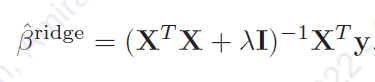
### The above formula can be used for determining the coefficients of ridge regression (but without bias)

In [61]:
# lambda_ = 0.0001
# ridge_coeffs = (np.linalg.inv(X_train.T.dot(X_train) +
#                (lambda_ * np.identity(X_train.shape[1])))).dot((X_train.T).dot(y_train.values))

In [62]:
# y_ridge_from_scratch = X_train.values.dot(ridge_coeffs)

In [111]:
# y_ridge_from_scratch

In [112]:
from sklearn.linear_model import Ridge
regressor3 = Ridge(alpha = 0.0001, fit_intercept=False)
regressor3.fit(x_train, y_train)

Ridge(alpha=0.0001, fit_intercept=False)

In [113]:
regressor3.score(x_train,y_train)

0.9227022219835253

In [114]:
regressor3.score(x_val,y_val)

0.8723881891393637

# Check linear regression Assumptions 
- By scatter to check zero mean and varience and QQ-plot & hist-plot to check normality

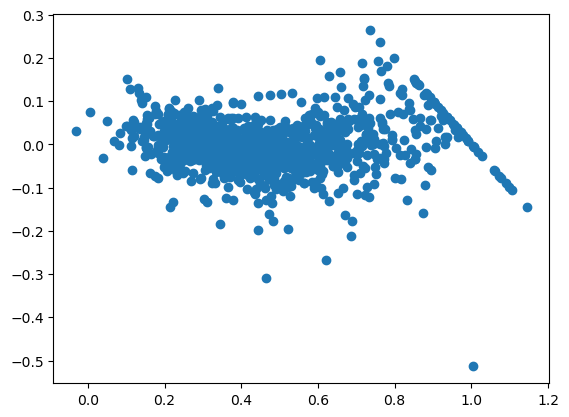

In [119]:
residuals = y_train - y_predicted_train
plt.scatter(y_predicted_train, residuals)
plt.show()

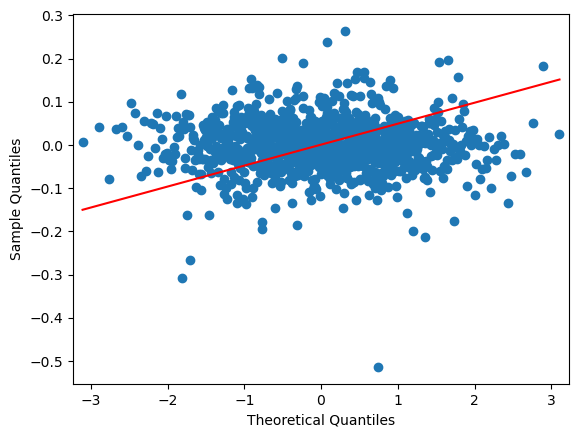

In [120]:
import statsmodels.api as sm
#create Q-Q plot 
fig = sm.qqplot(residuals,line='q', fit = False )
plt.show()

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

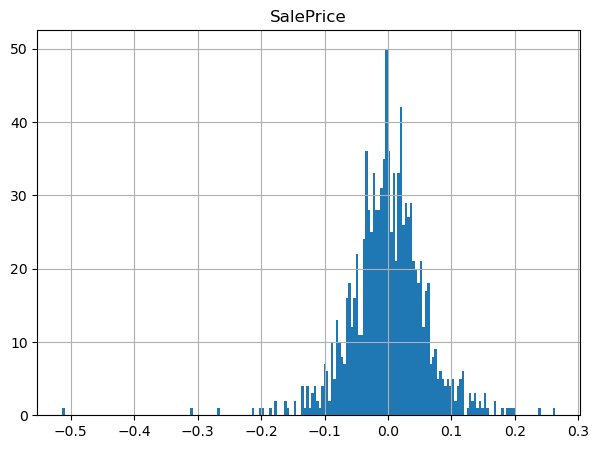

In [123]:
residuals.hist(bins = 200, figsize = (7, 5))

###### Suppose that linear regression not satisfied we will use 
### Basis Expantions

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x_train)

regressor4 = LinearRegression()
regressor4.fit(x_poly, y_train)

LinearRegression()

In [125]:
regressor4.score(x_poly, y_train)

1.0

In [127]:
x_val_poly = poly.fit_transform(x_val)

In [128]:
regressor4.score(x_val_poly , y_val)

0.6542854496172439

#### this is overfitting because LR satisfied but I do it Just Try 